In [1]:
print("Hello world")

Hello world


In [2]:
import numpy as np
import pandas as pd

In [3]:
sindf = pd.read_csv('./sinusoidal.csv')
sindf.head()

,X,y
0,2.353305,0.717852
1,5.973514,-0.334646
2,4.599254,-0.984431
3,3.761482,-0.779702
4,0.980294,0.808694


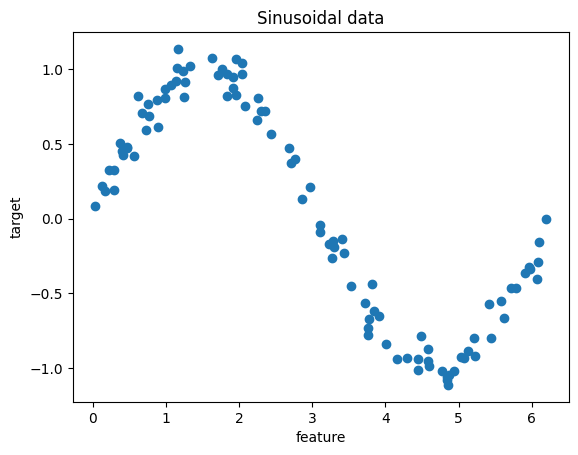

In [4]:
from matplotlib import pyplot as plt

plt.title("Sinusoidal data")
plt.xlabel("feature")
plt.ylabel("target")
plt.scatter(sindf['X'], sindf['y'])

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

feat = np.array(sindf['X'])
feat = feat.reshape(-1, 1)

feat = poly.fit_transform(feat)
tgt = sindf['y']

rreg = Ridge(alpha = 0.01)
rreg.fit(feat, tgt)

Ridge(alpha=0.01)

In [14]:
from sklearn.model_selection import cross_val_score

y_pred = rreg.predict(feat)

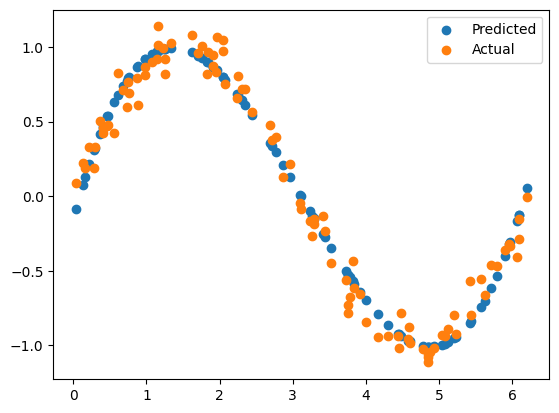

In [16]:
plt.scatter(sindf['X'], y_pred, label = "Predicted")
plt.scatter(sindf['X'], sindf['y'], label = "Actual")
plt.legend()

In [18]:
cross_val_score(rreg, feat, tgt, cv = 5).mean()

0.9742373162764115

In [20]:
sindf

,X,y
0,2.353305,0.717852
1,5.973514,-0.334646
2,4.599254,-0.984431
3,3.761482,-0.779702
4,0.980294,0.808694
...,...,...
95,3.102609,-0.042607
96,3.284427,-0.150060
97,2.686319,0.473823
98,0.159713,0.186704


In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse

def cross_val(features, target, alp, deg):
    scores = []
    # print(features)

    feat = np.array(features)
    feat = feat.reshape(-1, 1)
    p = PolynomialFeatures(deg)
    feat = p.fit_transform(feat)
    tgt = np.array(target)
    f_train, f_test, t_train, t_test = tts(feat, tgt, random_state = 42, train_size = 0.8)
    
    for _ in range(5):
        reg = Ridge(alpha = alp)        
        f_split, f1, t_split, t1 = tts(f_train, t_train, train_size = 0.8)

        reg.fit(f_split, t_split)
        pr = reg.predict(f1)

        sc = mse(y_true = t1, y_pred = pr)
        scores.append(sc)
    
    scores = np.array(scores)
    return scores

cross_val(sindf['X'], sindf['y'], alp = 0.01, deg = 3)

array([0.01012495, 0.01776289, 0.01664015, 0.0090172 , 0.01200938])

In [30]:
alphas = [0.01, 0.1, 1, 10, 100]
degs = [i for i in range(1, 6)]

minScore = float('inf')
minTup = []
for alpha in alphas:
    for deg in degs:
        cv = cross_val(sindf['X'], sindf['y'], alpha, deg).mean()
        if cv < minScore:
            minScore = cv
            minTup = (alpha, deg)

minTup,minScore


((0.1, 5), 0.009655163240114817)

In [31]:
rreg = Ridge(alpha = minTup[0])

X_train, X_test, y_train, y_test = tts(feat, tgt)
rreg.fit(X_train, y_train)

pr = rreg.predict(X_test)
mse(y_test, pr)

0.010507429741550074

In [ ]:
'''
    Degree of polynomial selects the best possible polynomial features.
    This has a direct influence on mse. It increases until optimal and then decreases

    CV is very much essential as it helps select the best hyper parameters. It checks the mse and then selcts models 
    accordingly

    Using library functions saves a lot of time rather than implementing the function
'''